In [1]:
import pandas as pd

In [34]:
import os
for entry in os.listdir('Documents/URV/cifar-10-dataset'):
    if entry.endswith(".csv"):
        print(entry)

test.csv
train.csv


In [30]:
import pandas as pd
test_data = pd.read_csv('Documents/URV/cifar-10-dataset/test.csv')
test_data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,158,159,165,166,160,156,162,159,158,159,...,130,123,145,167,182,175,145,124,129,110
1,235,231,232,232,232,232,232,232,232,232,...,108,117,123,133,141,153,163,178,191,199
2,158,158,139,132,166,182,187,193,199,205,...,45,46,44,44,43,52,37,8,3,7
3,155,167,176,190,177,166,168,166,170,179,...,52,55,70,103,105,72,53,50,52,50
4,65,70,48,30,23,40,44,45,45,40,...,102,127,156,139,131,130,147,136,146,117


In [33]:
import pandas as pd
train_data = pd.read_csv('Documents/URV/cifar-10-dataset/train.csv')
train_data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1


In [8]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [10]:
file = r'Documents/URV/cifar-10-batches-py/data_batch_1'
data_batch_1 = unpickle(file)

In [11]:
print(type(data_batch_1))

<class 'dict'>


In [12]:
print(data_batch_1.keys())

dict_keys(['batch_label', 'labels', 'data', 'filenames'])


In [13]:
for item in data_batch_1:
    print(item, type(data_batch_1[item]))

batch_label <class 'str'>
labels <class 'list'>
data <class 'numpy.ndarray'>
filenames <class 'list'>


In [15]:
print("Labels:", set(data_batch_1['labels']))

Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [17]:
X_train = data_batch_1['data']
X_train

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [18]:
X_train.shape

(10000, 3072)

In [19]:
meta_file = f'Documents/URV/cifar-10-batches-py/batches.meta'
meta_data = unpickle(meta_file)

In [20]:
print(type(meta_data))
print(meta_data.keys())

<class 'dict'>
dict_keys(['num_cases_per_batch', 'label_names', 'num_vis'])


In [21]:
print("Label Names:", meta_data['label_names'])

Label Names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [26]:
image = data_batch_1['data'][0]
image = image.reshape(3,32,32)
print(image.shape)

(3, 32, 32)


In [27]:
image = image.transpose(1,2,0)
print(image.shape)

(32, 32, 3)


In [33]:
X_train = data_batch_1['data']
print("Shape before reshape:", X_train.shape)
#Reshape the whole image data
X_train = X_train.reshape(len(X_train),3,32,32)
print("Shape after reshape and before transpose:", X_train.shape)
X_train = X_train.transpose(0,2,3,1)
print("Shape after reshape and transpose:", X_train.shape)

Shape before reshape: (10000, 3072)
Shape after reshape and before transpose: (10000, 3, 32, 32)
Shape after reshape and transpose: (10000, 32, 32, 3)


Text(0.5, 1.0, 'frog')

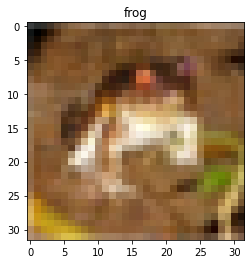

In [43]:
import matplotlib.pyplot as plt
#label names
label_name = meta_data['label_names']
#take first image
image = data_batch_1['data'][0]
#take first image label index
label = data_batch_1['labels'][0]
#Reshape the image
image = image.reshape(3,32,32)
#Transpose the image
image = image.transpose(1,2,0)
#Display the image
plt.imshow(image)
plt.title(label_name[label])

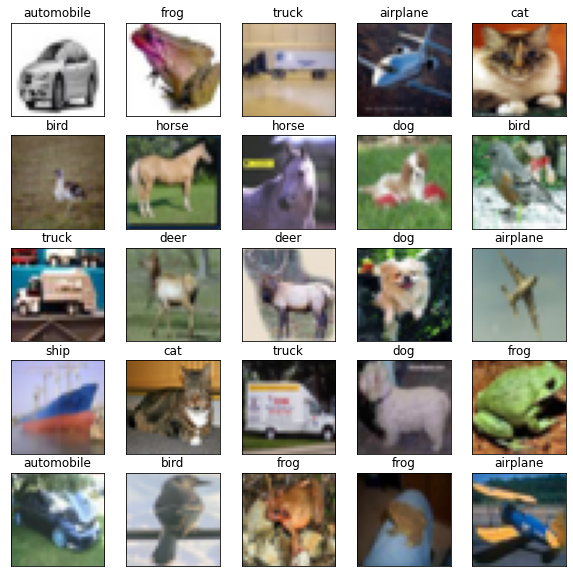

In [50]:
#Python 3 program to visualize 4th image
import matplotlib.pyplot as plt
import numpy as np
#take the images data from batch data
images = data_batch_1['data']
#reshape and transpose the images
images = images.reshape(len(images),3,32,32).transpose(0,2,3,1)
#take labels of the images
labels = data_batch_1['labels']
#label names of the images
label_names = meta_data['label_names']

#display random images
#define row and column of figure
rows, columns = 5, 5
#take random image index id
imageId = np.random.randint(0, len(images), rows * columns)
#take images for above random image index ids
images = images[imageId]
#take labels for these images only
labels = [labels[i] for i in imageId]

#define figure
fig = plt.figure(figsize = (10,10))
#visualize these random images
for i in range(1, columns * rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i-1])
    plt.xticks([])
    plt.yticks([])
    plt.title("{}".format(label_names[labels[i-1]]))
plt.show()

In [52]:
file = r'Documents/URV/cifar-100-python/train'
train_data = unpickle(file)

In [53]:
print(type(train_data))

<class 'dict'>


In [54]:
print(train_data.keys())

dict_keys(['filenames', 'batch_label', 'fine_labels', 'coarse_labels', 'data'])


In [55]:
for item in train_data:
    print(item, type(train_data[item]))

filenames <class 'list'>
batch_label <class 'str'>
fine_labels <class 'list'>
coarse_labels <class 'list'>
data <class 'numpy.ndarray'>


In [56]:
print("Fine Labels:", set(train_data['fine_labels']))
print("Coarse Labels:", set(train_data['coarse_labels']))

Fine Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
Coarse Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


In [57]:
X_train = train_data['data']
X_train

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       ...,
       [248, 240, 236, ..., 180, 174, 205],
       [156, 151, 151, ..., 114, 107, 126],
       [ 31,  30,  31, ...,  72,  69,  67]], dtype=uint8)

In [58]:
X_train.shape

(50000, 3072)

In [60]:
meta_file = r'Documents/URV/cifar-100-python/meta'
meta_data = unpickle(meta_file)

In [61]:
print(type(meta_data))
print(meta_data.keys())

<class 'dict'>
dict_keys(['fine_label_names', 'coarse_label_names'])


In [63]:
print("Fine Label Names:", meta_data['fine_label_names'])

Fine Label Names: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whal

In [64]:
print("Coarse Label Names:", meta_data['coarse_label_names'])

Coarse Label Names: ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']


In [65]:
X_train = train_data['data']
#Reshape the whole image data
X_train = X_train.reshape(len(X_train),3,32,32)
#Transpose the whole data
X_train = X_train.transpose(0,2,3,1)

Text(0.5, 1.0, 'Coarse Label Name:people \n  Fine Label Name:boy')

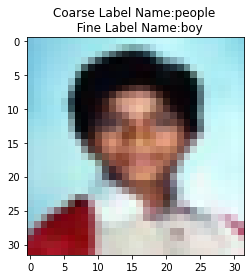

In [67]:
#Python 3 program to visualize 4th image
import matplotlib.pyplot as plt
#take 4th image from training data
image = train_data['data'][3]
#reshape and transpose the image
image = image.reshape(3,32,32).transpose(1,2,0)
#take coarse and fine labels of the image
c_label = train_data['coarse_labels'][3]
f_label = train_data['fine_labels'][3]
#take coarse and fine label names of the image
coarse_name = meta_data['coarse_label_names'][c_label]
fine_name = meta_data['fine_label_names'][f_label]
#display the image
plt.imshow(image)
plt.title("Coarse Label Name:{} \n  Fine Label Name:{}".format(coarse_name, fine_name))

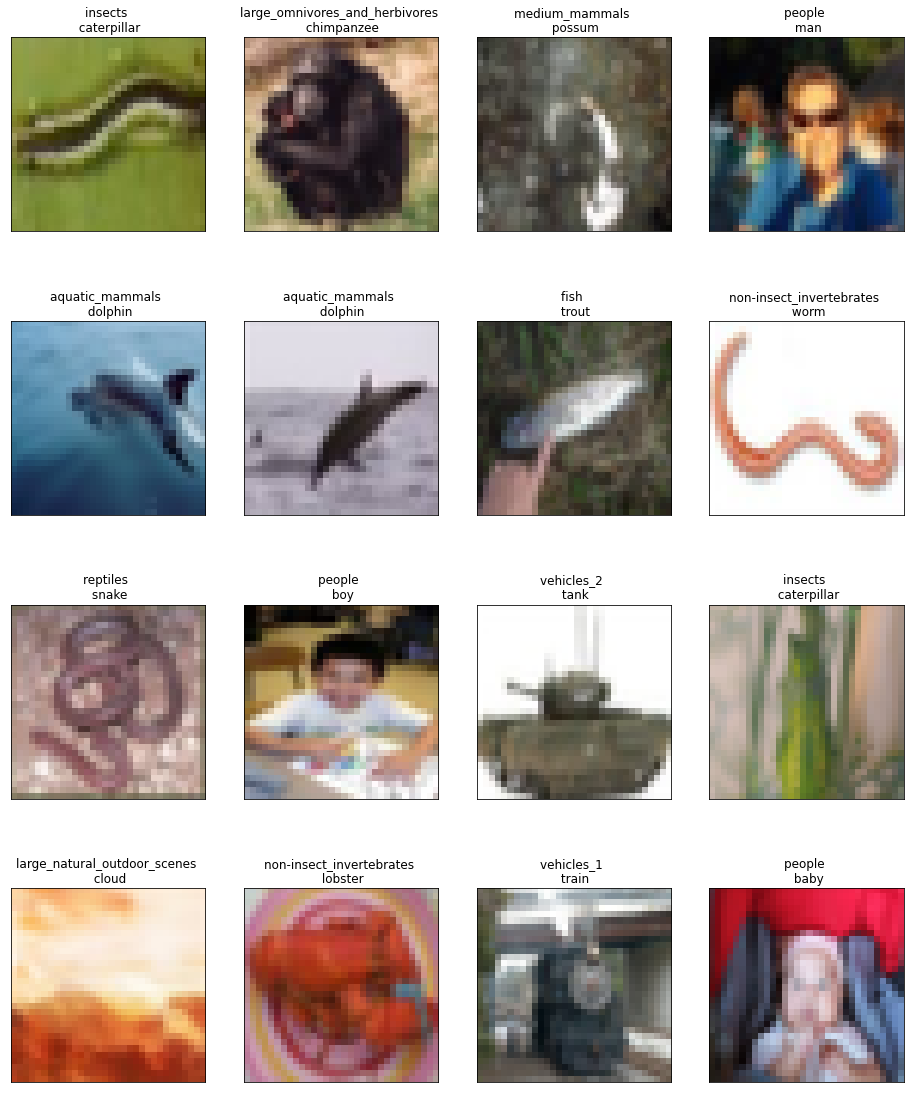

In [76]:
#Python 3 program to visualize 4th image
import matplotlib.pyplot as plt
import numpy as py
#take the images data from training data
images = train_data['data']
#reshape and transpose the images
images = images.reshape(len(images),3,32,32).transpose(0,2,3,1)
#take coarse and fine labels of the images
c_labels = train_data['coarse_labels']
#print(c_labels)
f_labels = train_data['fine_labels']
#take coarse and fine label names of the images
coarse_names = meta_data['coarse_label_names']
fine_names = meta_data['fine_label_names']

#display random nine images
#define row and column of figure
rows, columns = 4, 4
#take random image index Id
imageId = np.random.randint(0, len(images), rows * columns)
#take images for above random image Ids
images = images[imageId]
#take coarse and fine labels for these images only
c_labels = [c_labels[i] for i in imageId]
f_labels = [f_labels[j] for j in imageId]
#define figure
fig = plt.figure(figsize=(16,20))
#visualize these random images
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i-1])
    plt.xticks([])
    plt.yticks([])
    plt.title("{} \n {}".format(coarse_names[c_labels[i-1]], fine_names[f_labels[i-1]]))
plt.show()

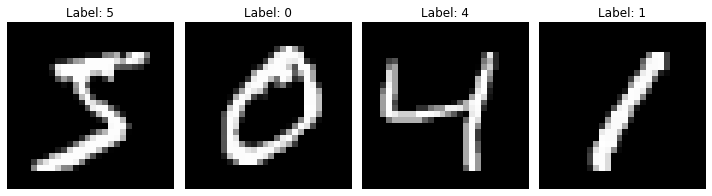

In [79]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

#Load the MNIST dataset
(X_train, y_train), (_,_) = mnist.load_data()

#Print 4 images in a row
plt.figure(figsize=(10,5))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

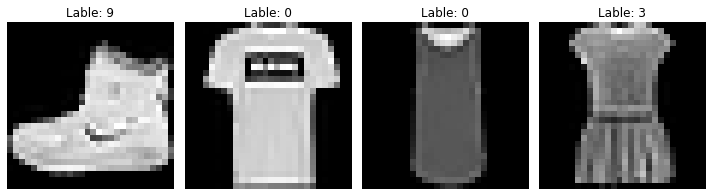

In [82]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

#Load the FMNIST dataset
(X_train, y_train), (_,_) = fashion_mnist.load_data()

#Print 4 images in a row
plt.figure(figsize=(10,5))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Lable: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [74]:
import os
for entry in os.listdir('Documents/URV/fmnist-dataset'):
    if entry.endswith(".csv"):
        print(entry)

fashion-mnist_test.csv
fashion-mnist_train.csv


In [37]:
import pandas as pd
train_data = pd.read_csv('Documents/URV/fmnist-dataset/fashion-mnist_train.csv')
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import pandas as pd
test_data = pd.read_csv('Documents/URV/fmnist-dataset/fashion-mnist_test.csv')
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
import os
for entry in os.listdir('Documents/URV/purchase-100-texas-100-datasets'):
    if entry.endswith(".npz"):
        print(entry)

texas100.npz
purchase100.npz


In [43]:
import numpy as np
data = np.load('Documents/URV/purchase-100-texas-100-datasets/texas100.npz')
features = data['features']
labels = data['labels']
print(features)
print(labels)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [1]:
import numpy as np
data = np.load('Documents/URV/purchase-100-texas-100-datasets/purchase100.npz')
features = data['features']
labels = data['labels']
print(features)
print(labels)

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 ...
 [0 1 0 ... 0 0 1]
 [0 1 0 ... 1 0 0]
 [0 1 0 ... 1 0 1]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
